# **<center><div class="alert-danger">Feature Engineering and House Price Predicton </div></center>**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

## **<div class="alert-warning"> Working on Train Dataset </div>**

In [3]:
data=pd.read_csv("Salesprice(train).csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
# taking columns with NaN values

null_features = [features for features in data.columns if data[features].isna().any()==True]

In [6]:
# checking percent NaN

for cols in null_features:
    print(cols,'  - ', np.round(data[cols].isnull().mean()*100, 4), '% NaN values')

LotFrontage   -  17.7397 % NaN values
Alley   -  93.7671 % NaN values
MasVnrType   -  0.5479 % NaN values
MasVnrArea   -  0.5479 % NaN values
BsmtQual   -  2.5342 % NaN values
BsmtCond   -  2.5342 % NaN values
BsmtExposure   -  2.6027 % NaN values
BsmtFinType1   -  2.5342 % NaN values
BsmtFinType2   -  2.6027 % NaN values
Electrical   -  0.0685 % NaN values
FireplaceQu   -  47.2603 % NaN values
GarageType   -  5.5479 % NaN values
GarageYrBlt   -  5.5479 % NaN values
GarageFinish   -  5.5479 % NaN values
GarageQual   -  5.5479 % NaN values
GarageCond   -  5.5479 % NaN values
PoolQC   -  99.5205 % NaN values
Fence   -  80.7534 % NaN values
MiscFeature   -  96.3014 % NaN values


Here as per description NaN is not a null value it signifies that particular attribute is Not Present in the house.

#### Finding if any relation in features having Nan values and SalePrice

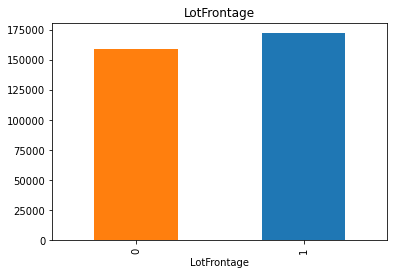

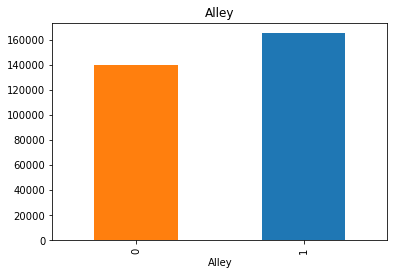

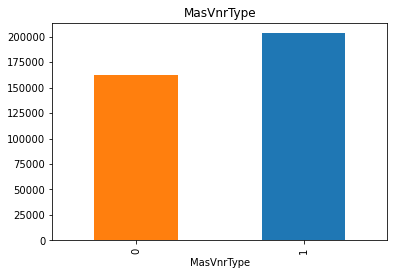

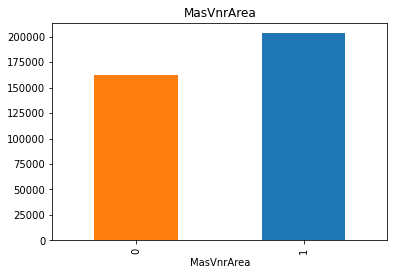

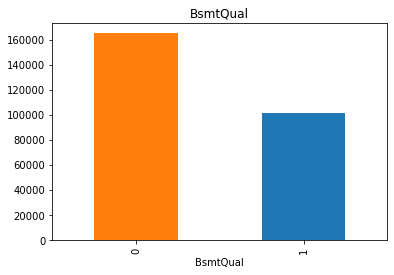

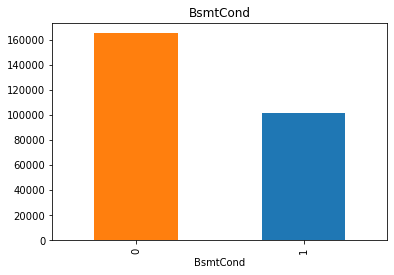

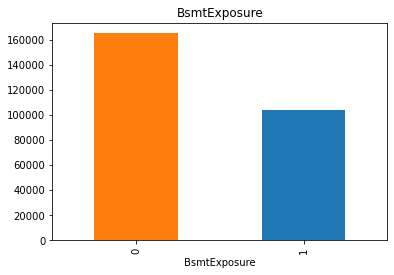

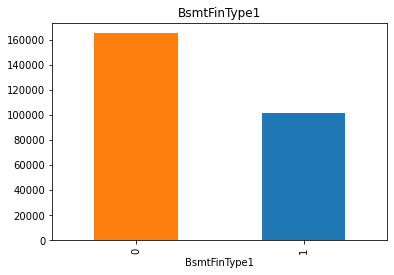

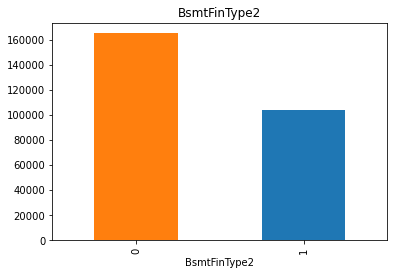

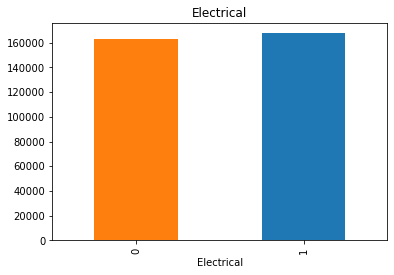

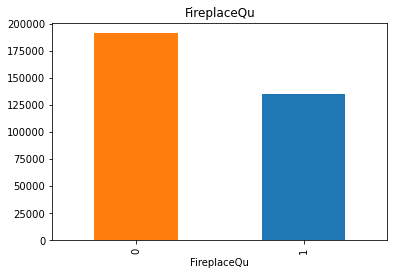

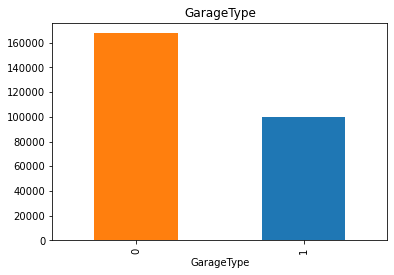

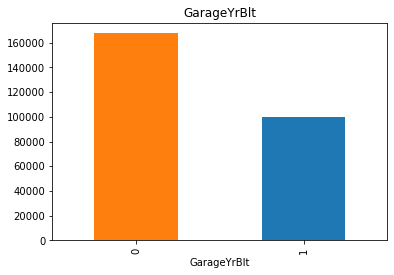

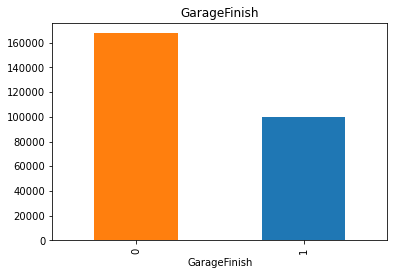

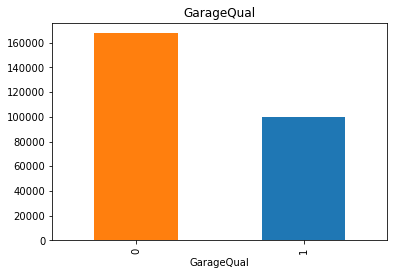

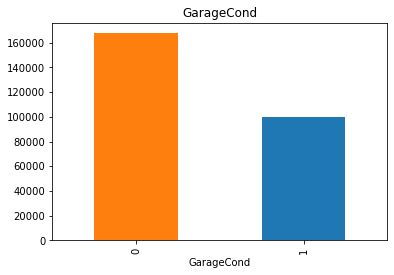

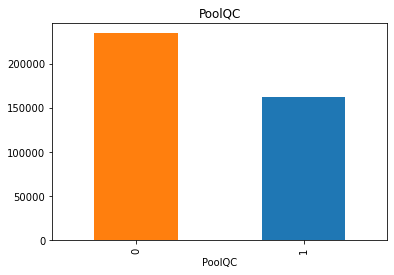

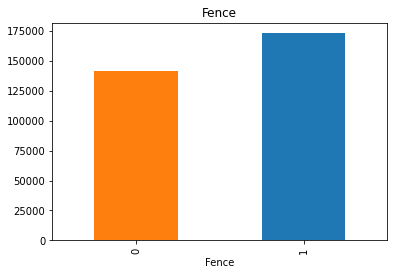

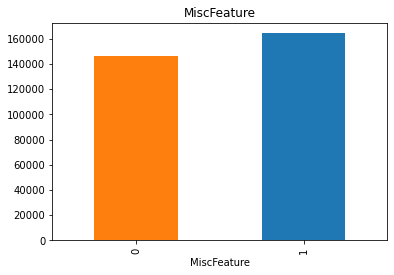

In [7]:
for feature in null_features:
    df=data.copy()
    df[feature]=np.where(df[feature].isnull(), 1, 0)
    
    df.groupby(feature)['SalePrice'].median().plot(kind='bar', color=['C1', 'C0'])
    plt.title(feature)
    plt.show()

There is a relation in dependent variable and missing values, we need to work with those features.

Id column is unique and can be dropped.

#### Numerical Variables

In [8]:
num_var = [features for features in data.columns if data[features].dtype != 'O']

print('Number of numerical variable =', len(num_var))
print(" ")
data[num_var].head()

Number of numerical variable = 38
 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


We find some Year columns, need to handle separately.

#### Temporal Variables

In [9]:
year_col = [features for features in num_var if 'Yr' in features or 'Year' in features]
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
for col in year_col:
    print(col)
    print(data[col].unique())

YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

We can convert these columns as number of years by using difference in YrSold and other Year columns.

First checking realtion with our dependent variable.

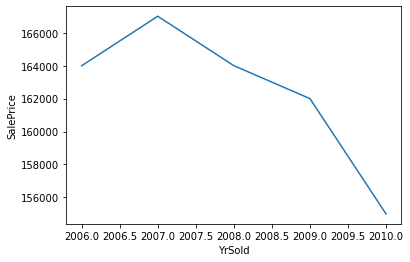

In [11]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('SalePrice');

Checking relation with other Year Columns.

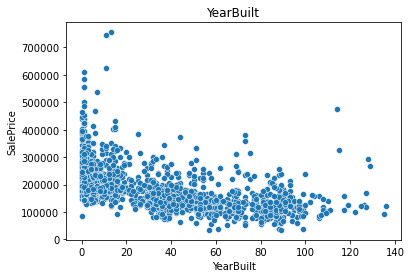

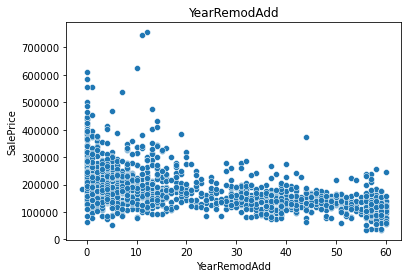

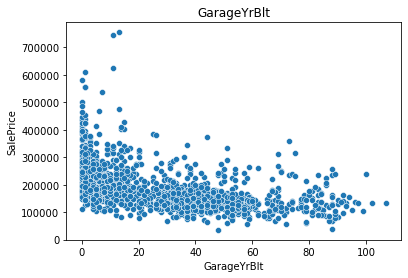

In [12]:
for feature in year_col[:-1]:
    df=data.copy()
    
    df[feature]=data['YrSold']-df[feature]
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(feature)
    plt.show();
    

Its clear where the houses are quite new, Sale Price is going higher.

#### Working on Discrete and Continuous Numerical Variables

***Discrete***

In [13]:
dicrete_num = [features for features in num_var[1:] if data[features].nunique()<=25 and features not in year_col]
print("Number of discrete numerical variables =", len(dicrete_num))
print(" ")
dicrete_num

Number of discrete numerical variables = 17
 


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [14]:
data[dicrete_num].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


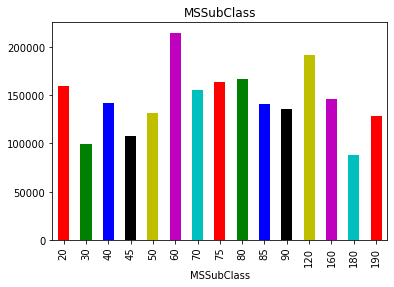

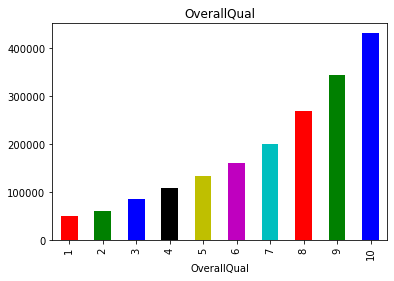

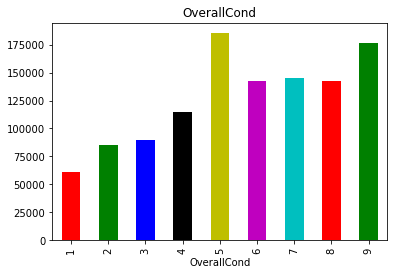

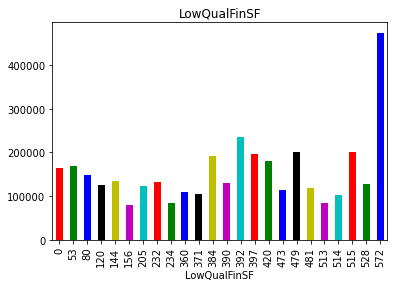

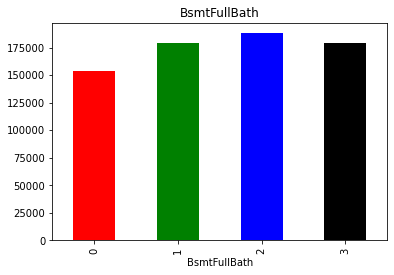

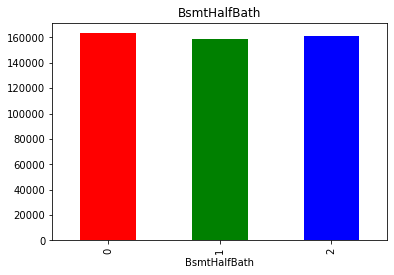

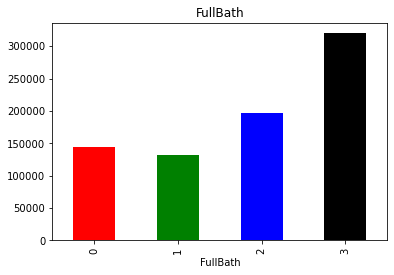

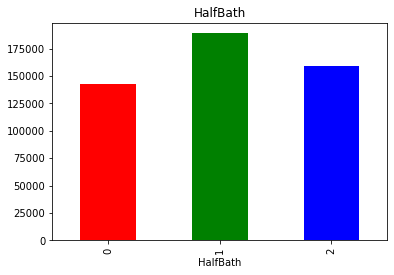

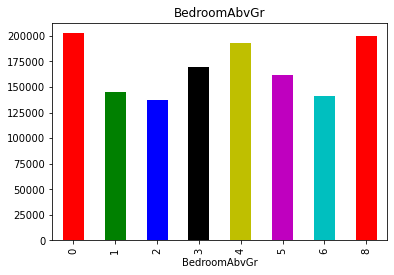

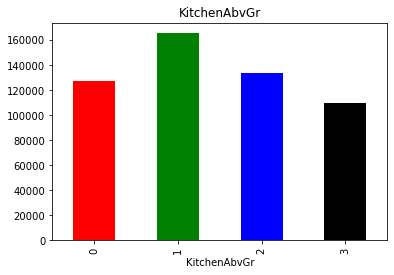

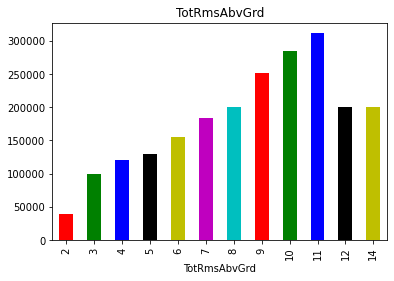

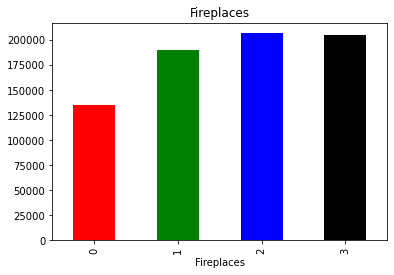

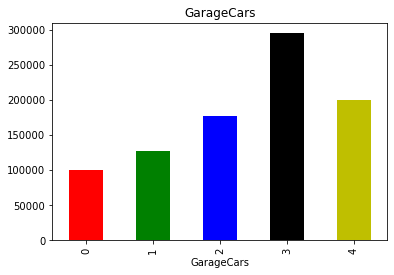

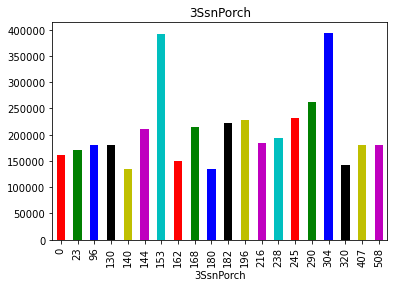

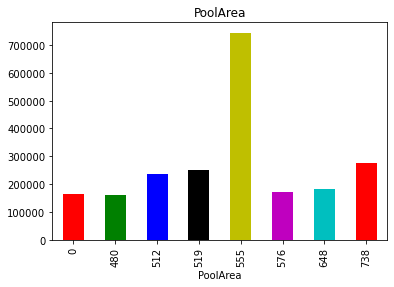

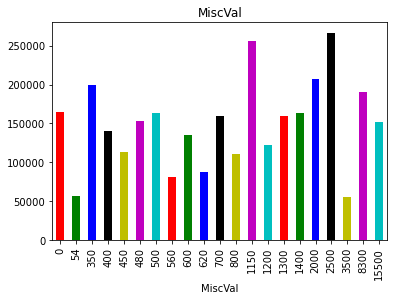

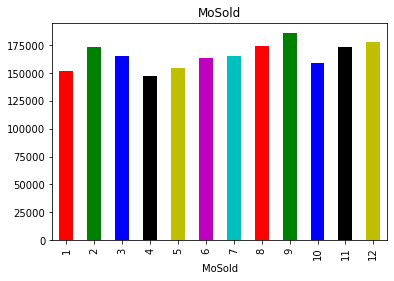

In [15]:
for feature in dicrete_num:
    df=data.copy()
    df.groupby(feature)['SalePrice'].median().plot(kind='bar',color = list('rgbkymc'))
    plt.title(feature)
    plt.show()

There is a realtionship in SalePrice and some of the discrete numerical variables.

***Continuous***

In [16]:
continuous_num = [features for features in num_var[1:] if data[features].nunique()>25 and features not in year_col]
print("Number of continuous numerical variables =", len(continuous_num))
print(" ")
continuous_num

Number of continuous numerical variables = 16
 


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

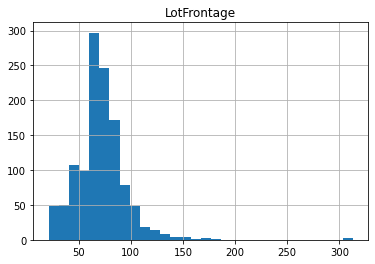

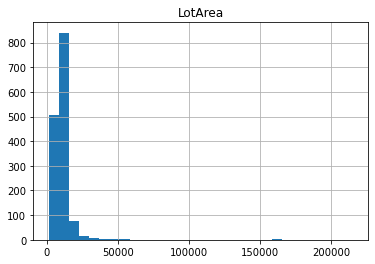

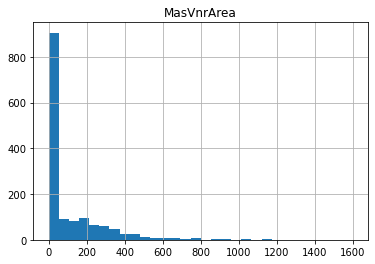

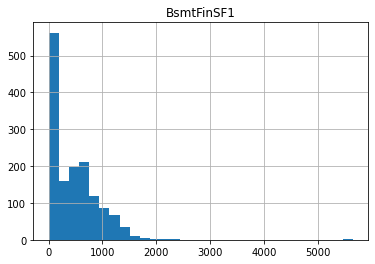

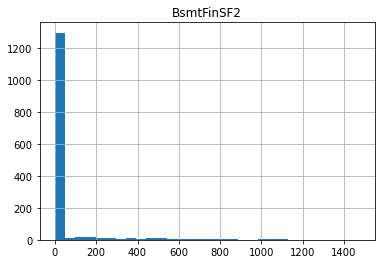

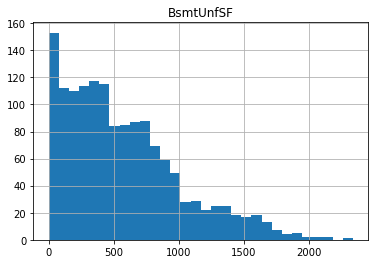

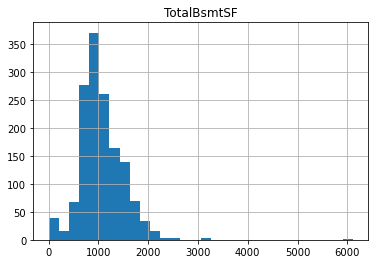

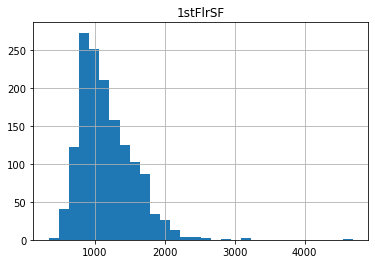

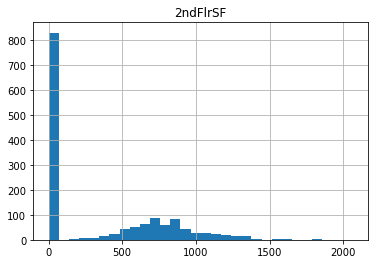

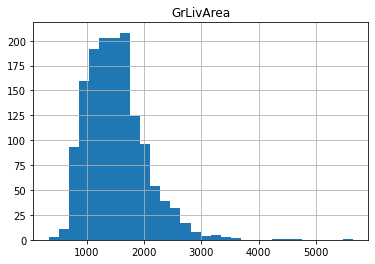

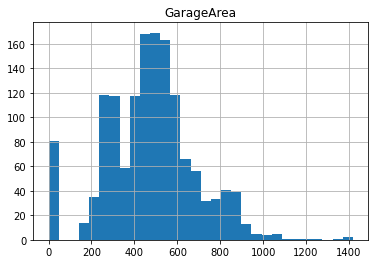

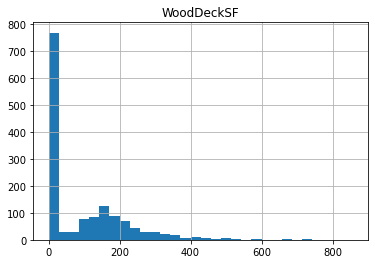

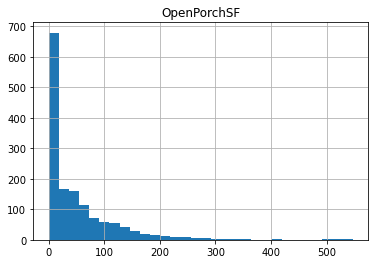

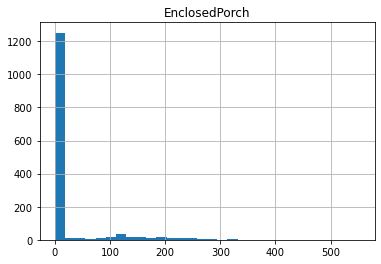

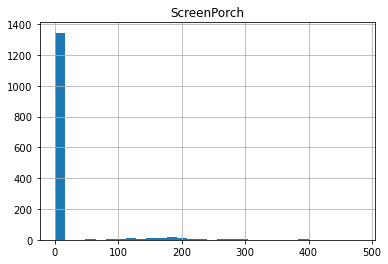

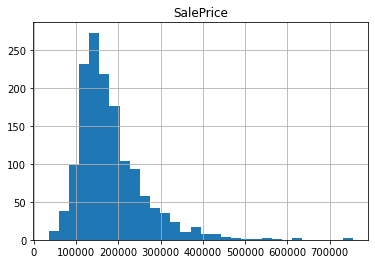

In [17]:
for feature in continuous_num:
    df=data.copy()
    df[feature].hist(bins=30)
    plt.title(feature)
    plt.show()

There are some Variables showing gaussian distribution, since most of the data is skewed, we will use logarithmic transformation.

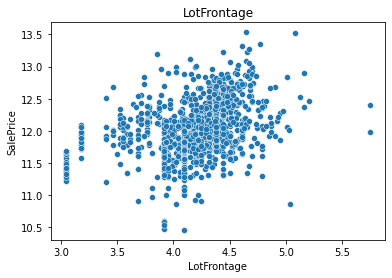

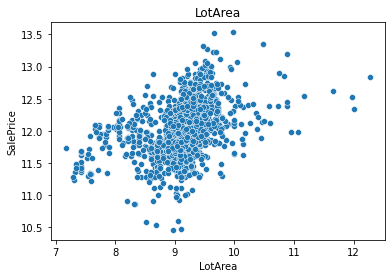

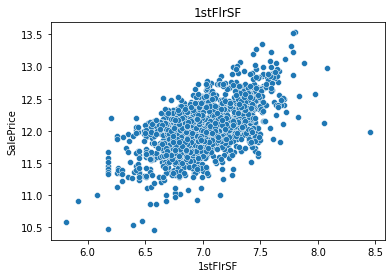

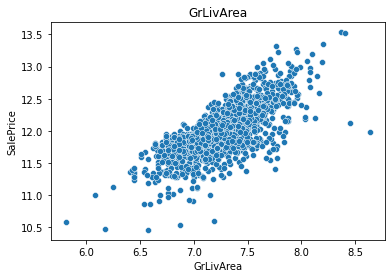

In [18]:
# Converting continuous numerical variable into log

for feature in continuous_num[:-1]:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['SalePrice']=np.log(df['SalePrice'])
        sns.scatterplot(df[feature], df['SalePrice'])
        plt.title(feature)
        plt.show()

#### Outliers

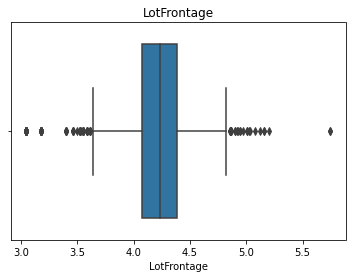

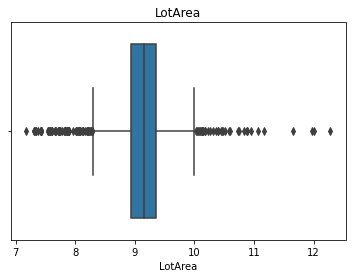

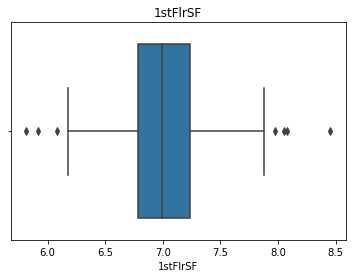

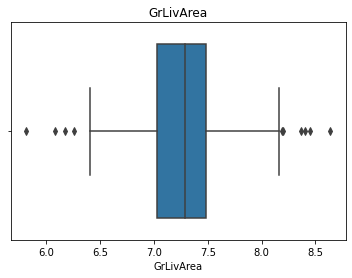

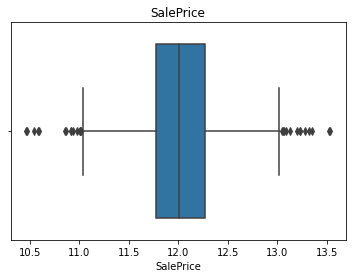

In [19]:
for feature in continuous_num:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        sns.boxplot(x=df[feature])
        plt.title(feature)
        plt.show()

#### Categorical Variables

In [20]:
cat_var = [features for features in data.columns if data[features].dtype == 'O']

print('Number of categorical variable =', len(cat_var))
print(" ")
data[cat_var].head()

Number of categorical variable = 43
 


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
for feature in cat_var:
    print("Column {} has .. {} .. categories".format(feature, data[feature].nunique()))

Column MSZoning has .. 5 .. categories
Column Street has .. 2 .. categories
Column Alley has .. 2 .. categories
Column LotShape has .. 4 .. categories
Column LandContour has .. 4 .. categories
Column Utilities has .. 2 .. categories
Column LotConfig has .. 5 .. categories
Column LandSlope has .. 3 .. categories
Column Neighborhood has .. 25 .. categories
Column Condition1 has .. 9 .. categories
Column Condition2 has .. 8 .. categories
Column BldgType has .. 5 .. categories
Column HouseStyle has .. 8 .. categories
Column RoofStyle has .. 6 .. categories
Column RoofMatl has .. 8 .. categories
Column Exterior1st has .. 15 .. categories
Column Exterior2nd has .. 16 .. categories
Column MasVnrType has .. 4 .. categories
Column ExterQual has .. 4 .. categories
Column ExterCond has .. 5 .. categories
Column Foundation has .. 6 .. categories
Column BsmtQual has .. 4 .. categories
Column BsmtCond has .. 4 .. categories
Column BsmtExposure has .. 4 .. categories
Column BsmtFinType1 has .. 6 .. c

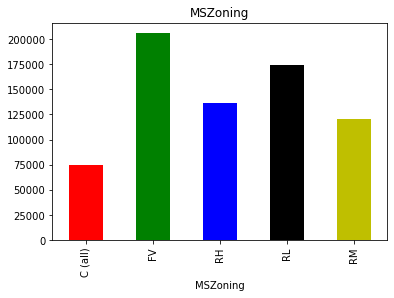

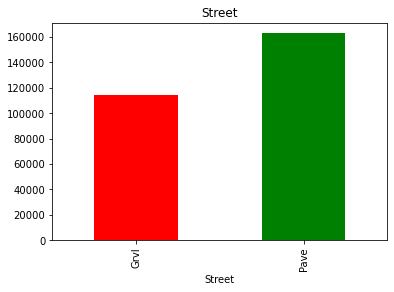

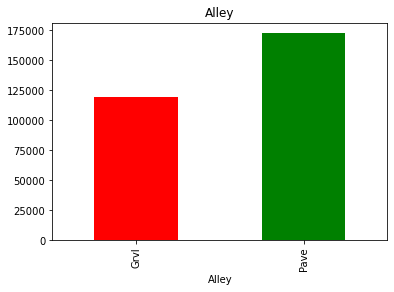

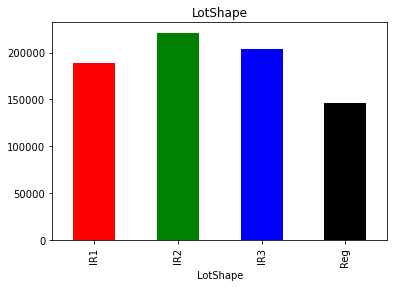

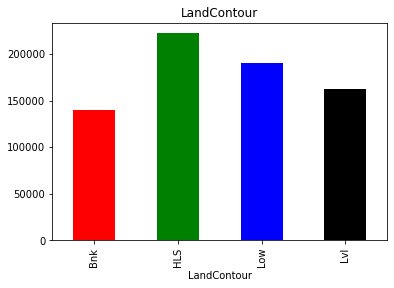

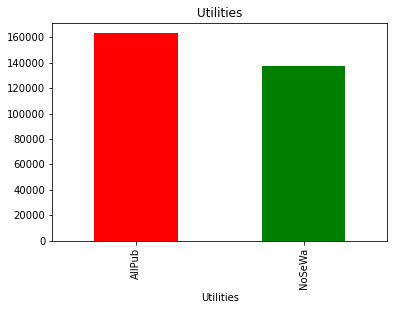

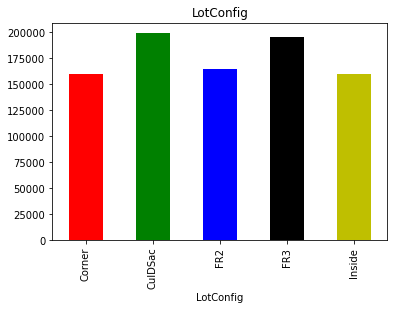

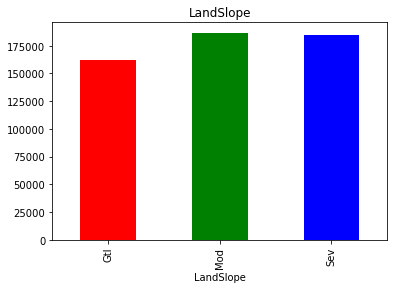

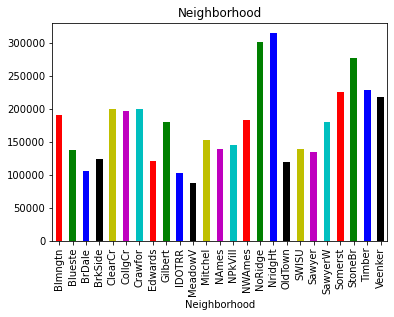

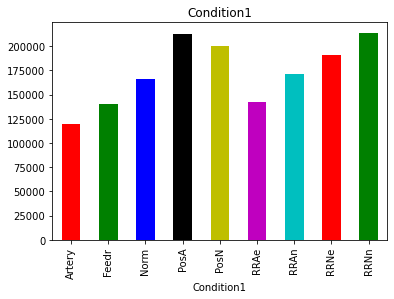

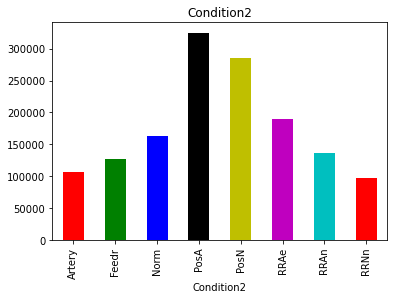

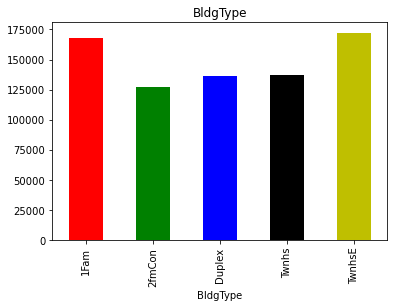

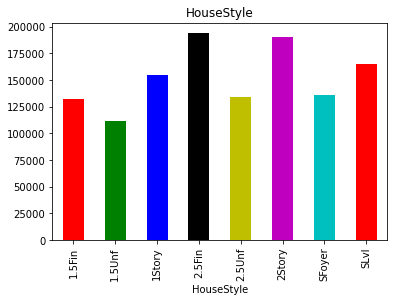

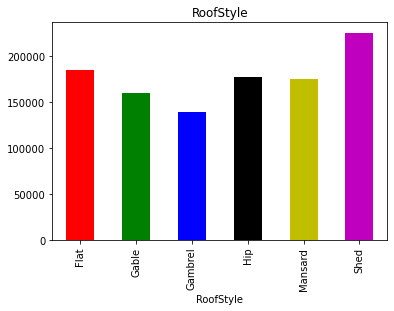

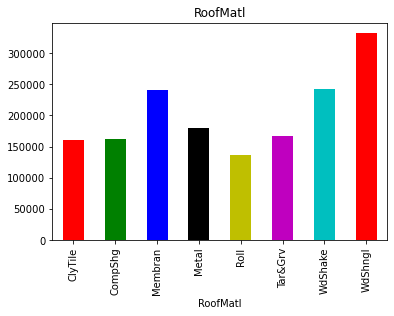

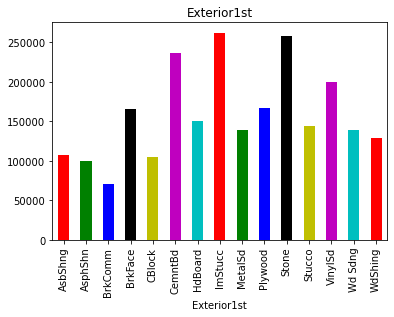

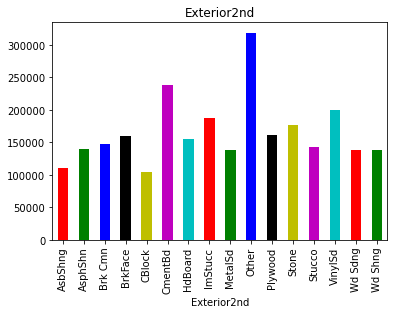

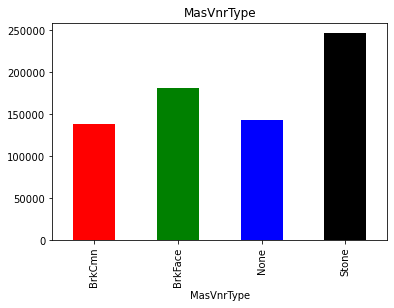

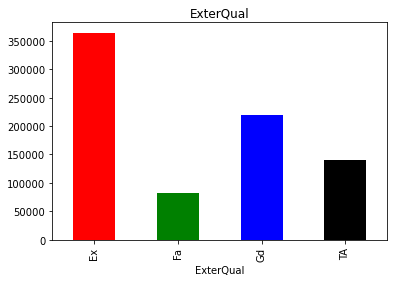

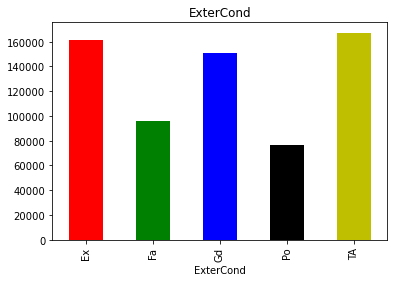

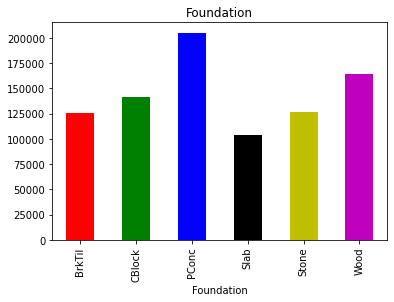

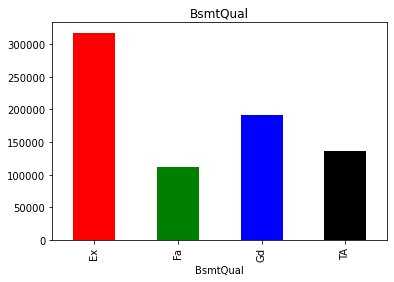

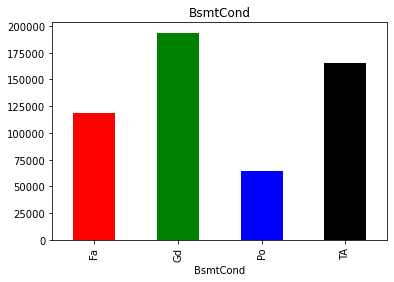

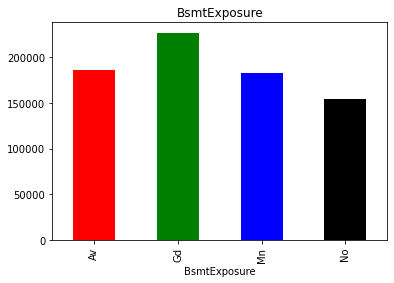

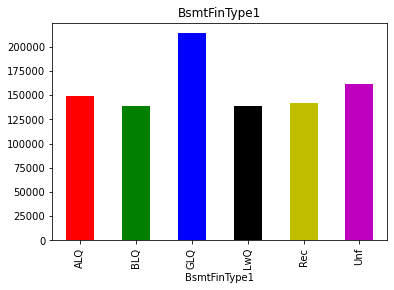

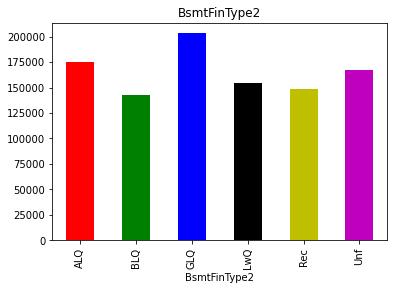

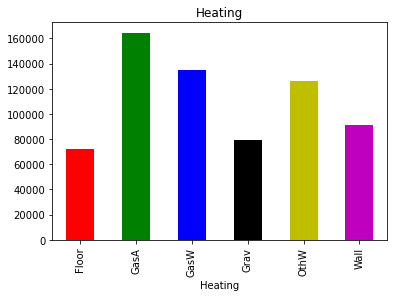

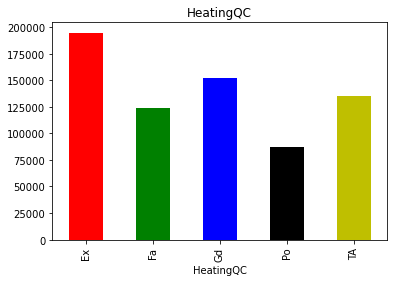

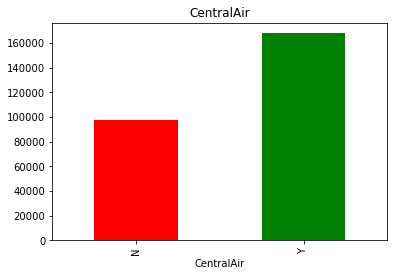

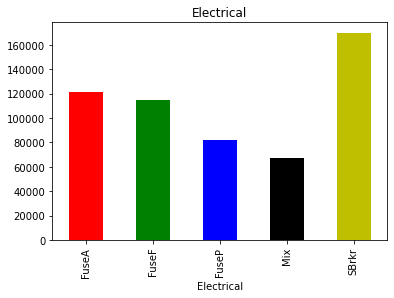

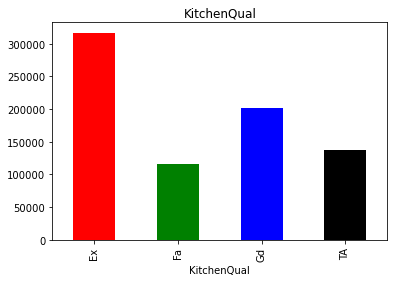

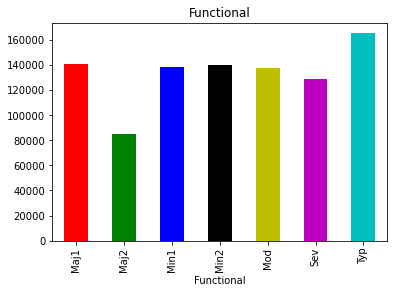

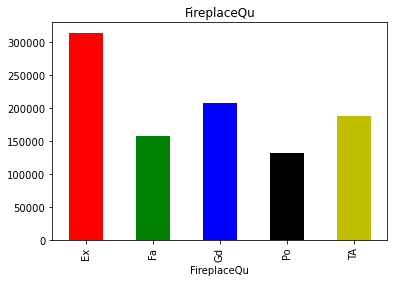

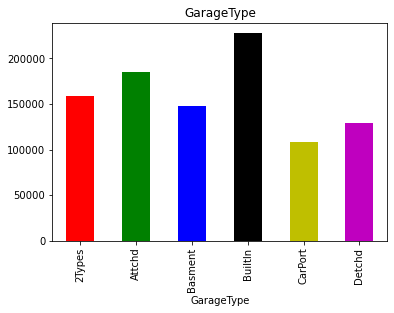

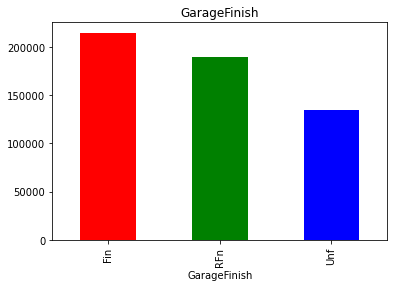

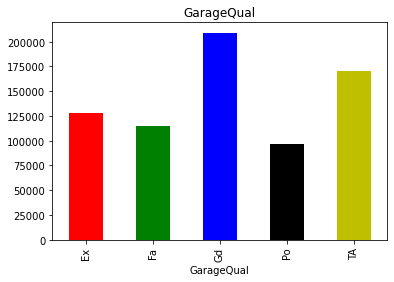

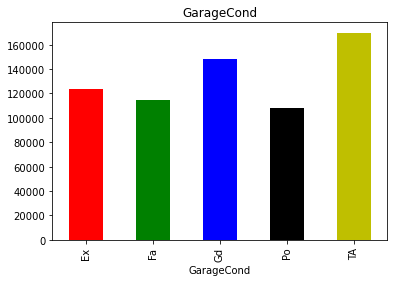

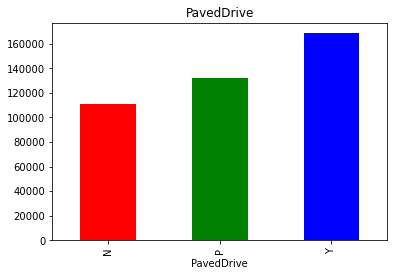

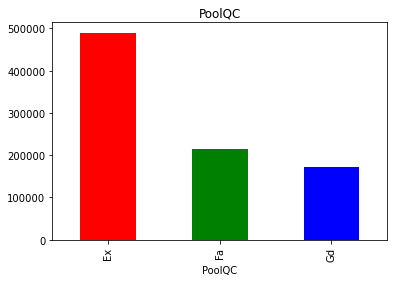

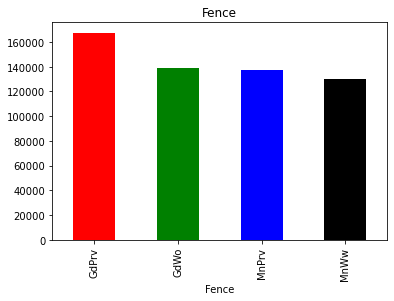

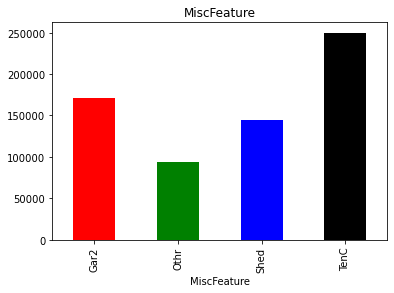

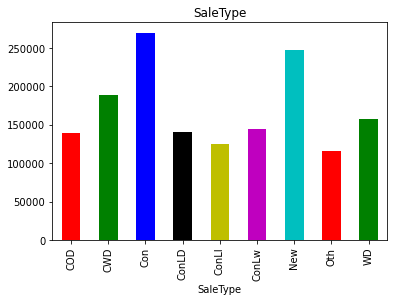

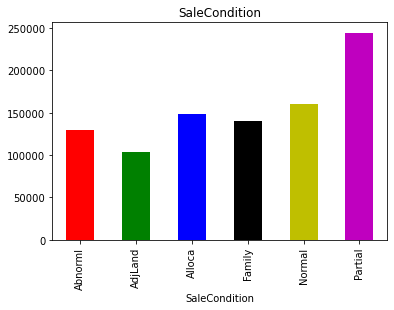

In [22]:
# Relation between dependent variable and categorical features

for feature in cat_var:
    df=data.copy()
    df.groupby(feature)['SalePrice'].median().plot(kind='bar',color = list('rgbkymc'))
    plt.title(feature)
    plt.show()

#### Working on Nan Values

In [23]:
# Variables with dtype Object

features_cat_nan = [features for features in data.columns if data[features].isna().any()==True and data[features].dtype=='O']
for cols in features_cat_nan:
    print(cols,'  - ', np.round(data[cols].isnull().mean()*100, 4), '% NaN values')

Alley   -  93.7671 % NaN values
MasVnrType   -  0.5479 % NaN values
BsmtQual   -  2.5342 % NaN values
BsmtCond   -  2.5342 % NaN values
BsmtExposure   -  2.6027 % NaN values
BsmtFinType1   -  2.5342 % NaN values
BsmtFinType2   -  2.6027 % NaN values
Electrical   -  0.0685 % NaN values
FireplaceQu   -  47.2603 % NaN values
GarageType   -  5.5479 % NaN values
GarageFinish   -  5.5479 % NaN values
GarageQual   -  5.5479 % NaN values
GarageCond   -  5.5479 % NaN values
PoolQC   -  99.5205 % NaN values
Fence   -  80.7534 % NaN values
MiscFeature   -  96.3014 % NaN values


In [24]:
# Replacing Nan with new label

data[features_cat_nan]=data[features_cat_nan].fillna('Not Present')
data[features_cat_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [25]:
data[features_cat_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Not Present,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Not Present,Attchd,RFn,TA,TA,Not Present,Not Present,Not Present
1,Not Present,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Not Present,Not Present,Not Present
2,Not Present,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Not Present,Not Present,Not Present
3,Not Present,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Not Present,Not Present,Not Present
4,Not Present,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Not Present,Not Present,Not Present


In [26]:
# for Numerical Variables

features_num_nan = [features for features in data.columns if data[features].isna().any()==True and data[features].dtype != 'O']

for cols in features_num_nan:
    print(cols,'  - ', np.round(data[cols].isnull().mean()*100, 4), '% NaN values')

LotFrontage   -  17.7397 % NaN values
MasVnrArea   -  0.5479 % NaN values
GarageYrBlt   -  5.5479 % NaN values


In [27]:
#Creating new feature to capture Nan values and then replacing them with median

for feature in features_num_nan:
    data[feature+'_num_nan']=np.where(data[feature].isnull(), 1, 0)
    data[feature].fillna(data[feature].median(), inplace=True)
    
data[features_num_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [28]:
data.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_num_nan,MasVnrArea_num_nan,GarageYrBlt_num_nan
0,1,60,RL,65.0,8450,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Present,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Present,Not Present,Not Present,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Not Present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Present,Not Present,Not Present,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Not Present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Present,Not Present,Not Present,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Not Present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Present,Not Present,Not Present,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Not Present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Present,Not Present,Not Present,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Not Present,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Not Present,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Not Present,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Not Present,Not Present,Not Present,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Not Present,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Not Present,Not Present,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,

In [29]:
# Working on temporal variables

for feature in year_col[:-1]:
    data[feature]=data['YrSold']-data[feature]
    

In [30]:
data[year_col[:-1]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


#### Feature Transformation

In [31]:
# Converting continuos numerical Variable using logarithmic transformation, leaving those having zero in it.

num_feature = [features for features in continuous_num if 0 not in data[features].unique()]
num_feature

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [32]:
for feature in num_feature:
    data[feature]=np.log(data[feature])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_num_nan,MasVnrArea_num_nan,GarageYrBlt_num_nan
0,1,60,RL,4.174387,9.041922,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Not Present,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Present,Not Present,Not Present,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Not Present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Present,Not Present,Not Present,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Not Present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Present,Not Present,Not Present,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Not Present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Present,Not Present,Not Present,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Not Present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Present,Not Present,Not Present,0,12,2008,WD,Normal,12.429216,0,0,0


#### Rare Categories in Features

In [33]:
# replacing those categories that are less than 1% in that features

for feature in cat_var:
    rare=data.groupby(feature)['SalePrice'].count()/len(data)
    rare_cat=rare[rare<=0.01].index
    data[feature]=np.where(data[feature].isin(rare_cat), 'Rare', data[feature])

In [34]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_num_nan,MasVnrArea_num_nan,GarageYrBlt_num_nan
1455,1456,60,RL,4.127134,8.976768,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,6.859615,694,0,7.406711,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Not Present,Not Present,Not Present,0,8,2007,WD,Normal,12.072541,0,0,0
1456,1457,20,RL,4.442651,9.486076,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,7.636752,0,0,7.636752,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Not Present,MnPrv,Not Present,0,2,2010,WD,Normal,12.254863,0,0,0
1457,1458,70,RL,4.189655,9.109636,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Rare,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,7.080026,1152,0,7.757906,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Not Present,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130,0,0,0
1458,1459,20,RL,4.219508,9.181632,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,60,14,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,6.982863,0,0,6.982863,1,0,1,0,2,1,Gd,5,Typ,0,Not Present,Attchd,60.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,Not Present,Not Present,Not Present,0,4,2010,WD,Normal,11.864462,0,0,0
1459,1460,20,RL,4.317488,9.204020,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,43,43,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,7.135687,0,0,7.135687,1,0,1,1,3,1,TA,6,Typ,0,Not Present,Attchd,43.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,Not Present,Not Present,Not Present,0,6,2008,WD,Normal,11.901583,0,0,0


In [35]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [36]:
for i in data.columns:
    if isinstance(data[i][0], str):
        data[i]=label.fit_transform(data[i])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_num_nan,MasVnrArea_num_nan,GarageYrBlt_num_nan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,3,2,706,6,0,150,856,0,0,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,3,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,3,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,2,2,486,6,0,434,920,0,0,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,3,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,3,0,216,6,0,540,756,0,2,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,3,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,3,0,0,12,2008,3,2,12.429216,0,0,0


#### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [38]:
new_var=[features for features in data.columns if features not in ['Id', 'SalePrice']]

In [39]:
for i in new_var:
    data[[i]]=scaler.fit_transform(data[[i]])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_num_nan,MasVnrArea_num_nan,GarageYrBlt_num_nan
0,1,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.090909,0.50,1.0,0.5,12.247694,0.0,0.0,0.0
1,2,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.363636,0.25,1.0,0.5,12.109011,0.0,0.0,0.0
2,3,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.727273,0.50,1.0,0.5,12.317167,0.0,0.0,0.0
3,4,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,0.75,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.090909,0.00,1.0,0.0,11.849398,0.0,0.0,0.0
4,5,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,1.000000,0.50,1.0,0.5,12.429216,0.0,0.0,0.0


In [40]:
data.to_csv('train.csv',index=False)

## **<div class="alert-warning"> Working on Test Dataset </div>**

In [41]:
data_test=pd.read_csv('test.csv')
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [42]:
data_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [43]:
null_features_test = [features for features in data_test.columns if data_test[features].isna().any()==True]

In [44]:
for cols in null_features_test:
    print(cols,'  - ', np.round(data_test[cols].isnull().mean()*100, 4), '% NaN values')

MSZoning   -  0.2742 % NaN values
LotFrontage   -  15.5586 % NaN values
Alley   -  92.6662 % NaN values
Utilities   -  0.1371 % NaN values
Exterior1st   -  0.0685 % NaN values
Exterior2nd   -  0.0685 % NaN values
MasVnrType   -  1.0966 % NaN values
MasVnrArea   -  1.0281 % NaN values
BsmtQual   -  3.0158 % NaN values
BsmtCond   -  3.0843 % NaN values
BsmtExposure   -  3.0158 % NaN values
BsmtFinType1   -  2.8787 % NaN values
BsmtFinSF1   -  0.0685 % NaN values
BsmtFinType2   -  2.8787 % NaN values
BsmtFinSF2   -  0.0685 % NaN values
BsmtUnfSF   -  0.0685 % NaN values
TotalBsmtSF   -  0.0685 % NaN values
BsmtFullBath   -  0.1371 % NaN values
BsmtHalfBath   -  0.1371 % NaN values
KitchenQual   -  0.0685 % NaN values
Functional   -  0.1371 % NaN values
FireplaceQu   -  50.0343 % NaN values
GarageType   -  5.209 % NaN values
GarageYrBlt   -  5.3461 % NaN values
GarageFinish   -  5.3461 % NaN values
GarageCars   -  0.0685 % NaN values
GarageArea   -  0.0685 % NaN values
GarageQual   -  5.34

In [45]:
features_cat_nan_test = [features for features in data_test.columns if data_test[features].isna().any()==True and data_test[features].dtype=='O']
for cols in features_cat_nan_test:
    print(cols,'  - ', np.round(data_test[cols].isnull().mean()*100, 4), '% NaN values')

MSZoning   -  0.2742 % NaN values
Alley   -  92.6662 % NaN values
Utilities   -  0.1371 % NaN values
Exterior1st   -  0.0685 % NaN values
Exterior2nd   -  0.0685 % NaN values
MasVnrType   -  1.0966 % NaN values
BsmtQual   -  3.0158 % NaN values
BsmtCond   -  3.0843 % NaN values
BsmtExposure   -  3.0158 % NaN values
BsmtFinType1   -  2.8787 % NaN values
BsmtFinType2   -  2.8787 % NaN values
KitchenQual   -  0.0685 % NaN values
Functional   -  0.1371 % NaN values
FireplaceQu   -  50.0343 % NaN values
GarageType   -  5.209 % NaN values
GarageFinish   -  5.3461 % NaN values
GarageQual   -  5.3461 % NaN values
GarageCond   -  5.3461 % NaN values
PoolQC   -  99.7944 % NaN values
Fence   -  80.1234 % NaN values
MiscFeature   -  96.5045 % NaN values
SaleType   -  0.0685 % NaN values


In [46]:
data_test[features_cat_nan_test]=data_test[features_cat_nan_test].fillna('Not Present')
data_test[features_cat_nan_test].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [49]:
features_num_nan_test = [features for features in data_test.columns if data_test[features].isna().any()==True and data_test[features].dtype != 'O']

for cols in features_num_nan_test:
    print(cols,'  - ', np.round(data_test[cols].isnull().mean()*100, 4), '% NaN values')

LotFrontage   -  15.5586 % NaN values
MasVnrArea   -  1.0281 % NaN values
BsmtFinSF1   -  0.0685 % NaN values
BsmtFinSF2   -  0.0685 % NaN values
BsmtUnfSF   -  0.0685 % NaN values
TotalBsmtSF   -  0.0685 % NaN values
BsmtFullBath   -  0.1371 % NaN values
BsmtHalfBath   -  0.1371 % NaN values
GarageYrBlt   -  5.3461 % NaN values
GarageCars   -  0.0685 % NaN values
GarageArea   -  0.0685 % NaN values


In [55]:
for cols in features_num_nan_test:
    data_test[cols].fillna(data_test[cols].median(), inplace=True)

In [56]:
data_test[features_num_nan_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [57]:
for feature in year_col[:-1]:
    data_test[feature]=data_test['YrSold']-data_test[feature]

In [58]:
data_test[year_col[:-1]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [61]:
num_feature_test = [features for features in continuous_num[:-1] if 0 not in data_test[features].unique()]
num_feature_test

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [62]:
for feature in num_feature_test:
    data_test[feature]=np.log(data_test[feature])

In [65]:
for feature in cat_var:
    rare_test=data_test.groupby(feature)['Id'].count()/len(data_test)
    rare_cat_test=rare_test[rare_test<=0.01].index
    data_test[feature]=np.where(data_test[feature].isin(rare_cat_test), 'Rare', data_test[feature])

In [67]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,Rare,4.382027,9.360655,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Not Present,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Not Present,MnPrv,Not Present,0,6,2010,WD,Normal
1,1462,20,RL,4.394449,9.565704,Pave,Not Present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Not Present,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Not Present,Not Present,Rare,12500,6,2010,WD,Normal
2,1463,60,RL,4.304065,9.534595,Pave,Not Present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Not Present,MnPrv,Not Present,0,3,2010,WD,Normal
3,1464,60,RL,4.356709,9.208138,Pave,Not Present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Not Present,Not Present,Not Present,0,6,2010,WD,Normal
4,1465,120,RL,3.761200,8.518193,Pave,Not Present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Not Present,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Not Present,Not Present,Not Present,0,1,2010,WD,Normal


In [70]:
for i in data_test.columns:
    if isinstance(data_test[i][0], str):
        data_test[i]=label.fit_transform(data_test[i])
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,4,4.382027,9.360655,0,1,3,3,0,3,0,9,1,0,0,1,5,6,49,49,0,0,8,9,1,0.0,3,3,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,4,0,3,1,49.0,3,1.0,730.0,3,3,2,140,0,0,0,120,0,0,2,0,0,6,2010,4,2
1,1462,20,2,4.394449,9.565704,0,1,0,3,0,0,0,9,2,0,0,1,6,6,52,52,1,0,9,10,0,108.0,3,3,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,4,0,3,1,52.0,3,1.0,312.0,3,3,2,393,36,0,0,0,0,0,3,1,12500,6,2010,4,2
2,1463,60,2,4.304065,9.534595,0,1,0,3,0,3,0,5,2,0,0,2,5,5,13,12,0,0,8,9,1,0.0,3,3,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,4,1,5,1,13.0,0,2.0,482.0,3,3,2,212,34,0,0,0,0,0,2,0,0,3,2010,4,2
3,1464,60,2,4.356709,9.208138,0,1,0,3,0,3,0,5,2,0,0,2,6,6,12,12,0,0,8,9,0,20.0,3,3,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,4,1,2,1,12.0,0,2.0,470.0,3,3,2,360,36,0,0,0,0,0,3,0,0,6,2010,4,2
4,1465,120,2,3.761200,8.518193,0,1,0,1,0,3,0,19,2,0,4,1,8,5,18,18,0,0,3,4,1,0.0,2,3,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,4,0,3,1,18.0,2,2.0,506.0,3,3,2,0,82,0,0,144,0,0,3,0,0,1,2010,4,2


In [76]:
for i in new_var[0:-3]:
    data_test[[i]]=scaler.fit_transform(data_test[[i]])
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.000000,1.0,0.593445,0.566360,0.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.45,0.166667,0.0,0.0,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.8,0.818182,0.25,0.000000,1.000000,1.0,0.25,1.0,1.0,0.75,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.0,0.5
1,1462,0.000000,0.5,0.598957,0.622527,0.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.45,0.333333,0.0,0.0,0.2,0.555556,0.625,0.407692,0.870968,0.5,0.0,0.9,0.909091,0.00,0.083721,1.000000,1.0,0.25,1.0,1.0,0.75,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.735294,0.454545,1.0,1.0,0.5
2,1463,0.235294,0.5,0.558854,0.614005,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.8,0.818182,0.25,0.000000,1.000000,1.0,0.50,0.5,1.0,0.75,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.181818,1.0,1.0,0.5
3,1464,0.235294,0.5,0.582212,0.524583,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.8,0.818182,0.00,0.015504,1.000000,1.0,0.50,1.0,1.0,0.75,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.0,0.5
4,1465,0.588235,0.5,0.317987,0.335596,0.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.95,0.333333,0.0,1.0,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.3,0.363636,0.25,0.000000,0.666667,1.0,0.50,0.5,1.0,0.75,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.75,0.0,0.000000,0.000000,1.0,1.0,0.5


In [77]:
data_test.to_csv('test_new.csv',index=False)

#### Feature Selection

In [79]:
train_df=pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_num_nan,MasVnrArea_num_nan,GarageYrBlt_num_nan
0,1,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.090909,0.50,1.0,0.5,12.247694,0.0,0.0,0.0
1,2,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.363636,0.25,1.0,0.5,12.109011,0.0,0.0,0.0
2,3,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.727273,0.50,1.0,0.5,12.317167,0.0,0.0,0.0
3,4,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,0.75,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.090909,0.00,1.0,0.0,11.849398,0.0,0.0,0.0
4,5,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.0,1.000000,0.50,1.0,0.5,12.429216,0.0,0.0,0.0


In [80]:
x=train_df.drop(['Id', 'SalePrice'], axis=1)
y=train_df['SalePrice']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=22)

In [83]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [170]:
select_feature=SelectFromModel(Lasso(alpha=0.004, random_state=22))
select_feature.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.004, random_state=22))

In [171]:
select_feature.get_support()

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [172]:
selected_features=x_train.columns[(select_feature.get_support())]
selected_features

Index(['MSZoning', 'LotArea', 'LotShape', 'BldgType', 'OverallQual',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [173]:
x_train_new=x_train[selected_features]
x_test_new=x_test[selected_features]

In [174]:
x_train_new.head()

,MSZoning,LotArea,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
571,0.50,0.338568,1.0,0.0,0.555556,0.786885,1.0,1.0,0.75,0.166667,0.0,1.0,1.0,0.359675,0.336216,0.333333,0.666667,0.0,0.0,1.000000,0.25,1.0
1356,0.50,0.388793,1.0,0.0,0.444444,0.704918,1.0,1.0,0.75,0.833333,1.0,1.0,1.0,0.371745,0.347498,0.000000,1.000000,0.0,0.0,0.666667,0.25,1.0
198,0.75,0.283010,1.0,0.0,0.555556,0.983607,1.0,1.0,0.75,1.000000,0.0,1.0,1.0,0.387125,0.671477,0.000000,1.000000,0.0,0.8,0.333333,0.00,1.0
230,0.50,0.373395,1.0,0.0,0.555556,0.852459,1.0,1.0,0.75,1.000000,1.0,1.0,1.0,0.482095,0.450651,0.333333,1.000000,0.0,0.0,0.666667,0.25,1.0
986,0.75,0.275419,1.0,0.0,0.555556,0.065574,1.0,1.0,0.75,1.000000,0.5,1.0,1.0,0.415374,0.561846,0.000000,0.666667,0.0,0.0,1.000000,0.25,1.0


## **<div class="alert-success">Model Selection and SalePrice Prediction </div>**

In [179]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.01, n_estimators = 600)
xgb.fit(x_train_new, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
y_predx=xgb.predict(x_test_new)

In [181]:
xgb.score(x_train_new, y_train)

0.9519720667222579

In [182]:
xgb.score(x_test_new, y_test) # r-square

0.87456801650249

In [185]:
test=pd.read_csv('test_new.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.000000,1.0,0.593445,0.566360,0.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.45,0.166667,0.0,0.0,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.8,0.818182,0.25,0.000000,1.000000,1.0,0.25,1.0,1.0,0.75,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.0,0.5
1,1462,0.000000,0.5,0.598957,0.622527,0.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.45,0.333333,0.0,0.0,0.2,0.555556,0.625,0.407692,0.870968,0.5,0.0,0.9,0.909091,0.00,0.083721,1.000000,1.0,0.25,1.0,1.0,0.75,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.735294,0.454545,1.0,1.0,0.5
2,1463,0.235294,0.5,0.558854,0.614005,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.8,0.818182,0.25,0.000000,1.000000,1.0,0.50,0.5,1.0,0.75,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.181818,1.0,1.0,0.5
3,1464,0.235294,0.5,0.582212,0.524583,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.8,0.818182,0.00,0.015504,1.000000,1.0,0.50,1.0,1.0,0.75,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.0,0.5
4,1465,0.588235,0.5,0.317987,0.335596,0.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.95,0.333333,0.0,1.0,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.3,0.363636,0.25,0.000000,0.666667,1.0,0.50,0.5,1.0,0.75,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.75,0.0,0.000000,0.000000,1.0,1.0,0.5


In [186]:
test_new=test[selected_features]

In [187]:
y_pred_test=xgb.predict(test_new)
y_pred_test

array([11.286163, 11.858948, 12.021471, ..., 11.915153, 11.613197,
       12.283103], dtype=float32)

In [188]:
test['SalePrice']=np.exp(y_pred_test)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,0.000000,1.00,0.593445,0.566360,0.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.45,0.166667,0.0,0.00,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.8,0.818182,0.25,0.000000,1.000000,1.0,0.25,1.0,1.0,0.75,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.000000,1.000000,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.0,0.5,79711.039062
1,1462,0.000000,0.50,0.598957,0.622527,0.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.45,0.333333,0.0,0.00,0.2,0.555556,0.625,0.407692,0.870968,0.5,0.0,0.9,0.909091,0.00,0.083721,1.000000,1.0,0.25,1.0,1.0,0.75,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.000000,1.000000,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.735294,0.454545,1.0,1.0,0.5,141343.406250
2,1463,0.235294,0.50,0.558854,0.614005,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.00,0.4,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.8,0.818182,0.25,0.000000,1.000000,1.0,0.50,0.5,1.0,0.75,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.000000,1.000000,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.181818,1.0,1.0,0.5,166287.093750
3,1464,0.235294,0.50,0.582212,0.524583,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.00,0.4,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.8,0.818182,0.00,0.015504,1.000000,1.0,0.50,1.0,1.0,0.75,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.000000,1.000000,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.0,0.5,177392.093750
4,1465,0.588235,0.50,0.317987,0.335596,0.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.95,0.333333,0.0,1.00,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.3,0.363636,0.25,0.000000,0.666667,1.0,0.50,0.5,1.0,0.75,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.000000,1.000000,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.75,0.0,0.000000,0.000000,1.0,1.0,0.5,179586.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.823529,0.75,0.000000,0.075426,0.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.35,0.333333,0.0,0.75,0.4,0.333333,0.750,0.284615,0.612903,0.0,0.0,0.2,0.272727,0.25,0.000000,1.000000,1.0,0.25,1.0,1.0,0.75,1.000000,0.000000,1.0,0.000000,0.255140,0.107

In [189]:
sub=test[['Id', 'SalePrice']]
sub

,Id,SalePrice
0,1461,79711.039062
1,1462,141343.406250
2,1463,166287.093750
3,1464,177392.093750
4,1465,179586.375000
...,...,...
1454,2915,68402.351562
1455,2916,75451.546875
1456,2917,149515.078125
1457,2918,110547.140625


In [190]:
sub.to_csv('Submission_xgb.csv',  header=True, index=False)